In [86]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",100)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [87]:
train=pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [89]:
print(train.dtypes.head())

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object


In [90]:
train.isnull().sum().head()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
dtype: int64

In [91]:
test.isnull().sum().head()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
dtype: int64

In [92]:
#欠損地の多い項目の削除
#Alleyの削除
train=train.drop("Alley",axis=1)
test=test.drop("Alley",axis=1)
#PoolQCの削除
train=train.drop("PoolQC",axis=1)
test=test.drop("PoolQC",axis=1)
#Fenceの削除
train=train.drop("Fence",axis=1)
test=test.drop("Fence",axis=1)
#MiscFeatureの削除
train=train.drop("MiscFeature",axis=1)
test=test.drop("MiscFeature",axis=1)
#FireplaceQuの削除
train=train.drop("FireplaceQu",axis=1)
test=test.drop("FireplaceQu",axis=1)

In [93]:
#欠損値の補完
#BasementとGarageの欠損値は存在しない場合が考えられるためNoneでReplace
train["BsmtQual"].fillna('None', inplace=True)
test["BsmtQual"].fillna('None', inplace=True)
train["BsmtCond"].fillna('None', inplace=True)
test["BsmtCond"].fillna('None', inplace=True)
train["BsmtExposure"].fillna('None', inplace=True)
test["BsmtExposure"].fillna('None', inplace=True)
train["BsmtFinType1"].fillna('None', inplace=True)
test["BsmtFinType1"].fillna('None', inplace=True)
train["BsmtFinSF1"].fillna('None', inplace=True)
test["BsmtFinSF1"].fillna('None', inplace=True)
train["BsmtFinType2"].fillna('None', inplace=True)
test["BsmtFinType2"].fillna('None', inplace=True)
train["BsmtFinSF2"].fillna('None', inplace=True)
test["BsmtFinSF2"].fillna('None', inplace=True)
train["BsmtUnfSF"].fillna('None', inplace=True)
test["BsmtUnfSF"].fillna('None', inplace=True)
train["TotalBsmtSF"].fillna('None', inplace=True)
test["TotalBsmtSF"].fillna('None', inplace=True)
train["GarageType"].fillna('None', inplace=True)
test["GarageType"].fillna('None', inplace=True)
train["GarageYrBlt"].fillna('None', inplace=True)
test["GarageYrBlt"].fillna('None', inplace=True)
train["GarageFinish"].fillna('None', inplace=True)
test["GarageFinish"].fillna('None', inplace=True)
train["GarageCars"].fillna('None', inplace=True)
test["GarageCars"].fillna('None', inplace=True)
train["GarageArea"].fillna('None', inplace=True)
test["GarageArea"].fillna('None', inplace=True)
train["GarageQual"].fillna('None', inplace=True)
test["GarageQual"].fillna('None', inplace=True)
train["GarageCond"].fillna('None', inplace=True)
test["GarageCond"].fillna('None', inplace=True)
#testデータのみに現れた欠損値の削除
test["BsmtFullBath"].fillna('None', inplace=True)
test["BsmtHalfBath"].fillna('None', inplace=True)
#0で補完
train["MasVnrArea"].fillna(0,inplace=True)
test["MasVnrArea"].fillna(0,inplace=True)
#Neighborhoodでグループし平均をとって補完
f = lambda x: x.fillna(x.mean())
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(f)
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(f)

In [94]:
#種類の少ない項目の削除
#Utilitiesの削除
train=train.drop("Utilities",axis=1)
test=test.drop("Utilities",axis=1)

In [95]:
#総床面積を算出する
train["TotalFlrSF"]=train["1stFlrSF"]+train["2ndFlrSF"]
test["TotalFlrSF"]=test["1stFlrSF"]+test["2ndFlrSF"]

In [96]:
#階別床面積の項目の削除
train=train.drop("1stFlrSF",axis=1)
test=test.drop("1stFlrSF",axis=1)
train=train.drop("2ndFlrSF",axis=1)
test=test.drop("2ndFlrSF",axis=1)

In [97]:
#LabelEncoderでObjectをカテゴリーの数値に変換
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl=LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values)+list(test.iloc[:,i].values))
        train.iloc[:,i]=lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i]=lbl.transform(list(test.iloc[:,i].values))

In [98]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFlrSF
0,1,60,3,65.0,8450,1,3,3,4,0,...,0,0,0,0,2,2008,8,4,208500,1710
1,2,20,3,80.0,9600,1,3,3,2,0,...,0,0,0,0,5,2007,8,4,181500,1262
2,3,60,3,68.0,11250,1,0,3,4,0,...,0,0,0,0,9,2008,8,4,223500,1786
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,2,2006,8,0,140000,1717
4,5,60,3,84.0,14260,1,0,3,2,0,...,0,0,0,0,12,2008,8,4,250000,2198


In [99]:
##各項目のラベリングの確認
#print(train[""].unique())

In [100]:
train["YearBuilt"].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [101]:
#建設年から築年数への変換
train["Age"]=2018-train["YearBuilt"]
test["Age"]=2018-test["YearBuilt"]

In [102]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFlrSF,Age
0,1,60,3,65.0,8450,1,3,3,4,0,...,0,0,0,2,2008,8,4,208500,1710,15
1,2,20,3,80.0,9600,1,3,3,2,0,...,0,0,0,5,2007,8,4,181500,1262,42
2,3,60,3,68.0,11250,1,0,3,4,0,...,0,0,0,9,2008,8,4,223500,1786,17
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,2,2006,8,0,140000,1717,103
4,5,60,3,84.0,14260,1,0,3,2,0,...,0,0,0,12,2008,8,4,250000,2198,18


In [103]:
train=train.drop("YearBuilt",axis=1)
test=test.drop("YearBuilt",axis=1)

/Users/matsunaganaoki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


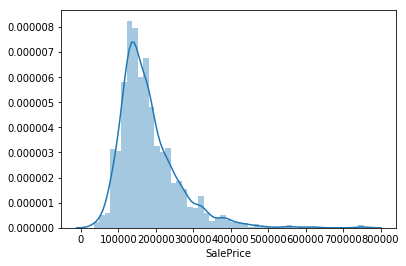

In [104]:
import seaborn as sns
y_train=train["SalePrice"]
ax=sns.distplot(y_train)
plt.show()

/Users/matsunaganaoki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


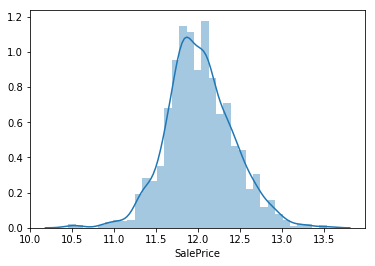

In [105]:
y_train=np.log(y_train)
ax=sns.distplot(y_train)
plt.show()

In [106]:
y_train=train[["SalePrice"]]
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [107]:
X_train=train.drop("SalePrice",axis=1)
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFlrSF,Age
0,1,60,3,65.0,8450,1,3,3,4,0,...,0,0,0,0,2,2008,8,4,1710,15
1,2,20,3,80.0,9600,1,3,3,2,0,...,0,0,0,0,5,2007,8,4,1262,42
2,3,60,3,68.0,11250,1,0,3,4,0,...,0,0,0,0,9,2008,8,4,1786,17
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,2,2006,8,0,1717,103
4,5,60,3,84.0,14260,1,0,3,2,0,...,0,0,0,0,12,2008,8,4,2198,18


In [108]:
from sklearn.model_selection import train_test_split
X_1_train,X_1_test,y_1_train,y_1_test=train_test_split(X_train,y_train,test_size=0.25,random_state=0)

/Users/matsunaganaoki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[5.38369921e-03 1.38475946e-03 1.87616587e-03 7.36331665e-03
 1.30083299e-02 2.68061723e-05 3.26882543e-03 8.72375844e-04
 6.53076002e-04 5.71713984e-04 5.10092123e-03 6.64946916e-04
 2.46638033e-04 3.16884347e-04 6.48062992e-04 5.74821470e-01
 4.76069868e-03 6.61733056e-03 9.44108684e-04 1.22656473e-03
 2.27391050e-03 7.66860733e-04 7.28885502e-04 2.09864689e-02
 1.80417545e-03 4.43882678e-04 4.88548296e-04 5.72541018e-03
 4.83561625e-04 2.49156030e-03 1.99716664e-03 3.09234733e-02
 2.90638727e-04 3.78973685e-04 6.95128772e-03 4.73635280e-02
 4.47482065e-05 1.06431338e-03 4.12825623e-03 1.20922489e-04
 1.81463992e-04 3.22653199e-02 1.06465341e-03 6.21426544e-04
 1.39744424e-03 8.59793299e-04 1.35959187e-03 1.62528508e-03
 3.16580446e-03 6.24801404e-03 3.97230670e-04 3.53980423e-03
 4.36367161e-03 4.92779515e-03 2.03857966e-03 2.48859905e-02
 2.14242132e-02 6.84728538e-04 4.46980932e-04 3.37837280e-04
 4.70178877e-03 5.01167230e-03 7.64510952e-04 1.25634604e-04
 6.72970958e-04 3.023539

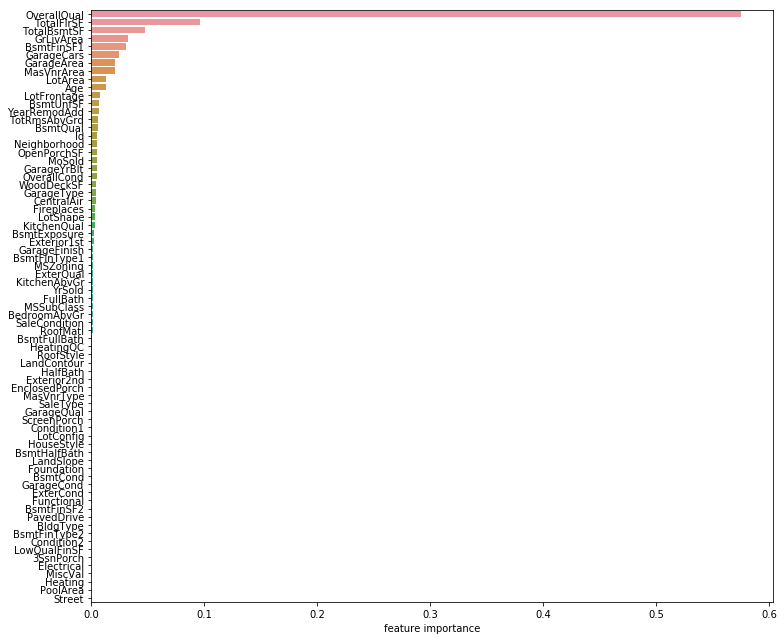

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_1_train, y_1_train)
print(rf.feature_importances_)


ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_1_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [110]:
#重要度の高い順に10個の特徴を用いる

In [111]:
a=X_1_train.columns[ranking]
a[0:10]

Index(['OverallQual', 'TotalFlrSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFinSF1',
       'GarageCars', 'GarageArea', 'MasVnrArea', 'LotArea', 'Age'],
      dtype='object')

In [112]:
X_train_pickup=train.loc[:,['OverallQual', 'TotalFlrSF', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1','GarageCars', 'GarageArea', 'LotFrontage','MasVnrArea', 'LotArea','SalePrice']]
X_train_pickup.head()

,OverallQual,TotalFlrSF,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageCars,GarageArea,LotFrontage,MasVnrArea,LotArea,SalePrice
0,7,1710,1710,856,706,2,548,65.0,196.0,8450,208500
1,6,1262,1262,1262,978,2,460,80.0,0.0,9600,181500
2,7,1786,1786,920,486,2,608,68.0,162.0,11250,223500
3,7,1717,1717,756,216,3,642,60.0,0.0,9550,140000
4,8,2198,2198,1145,655,3,836,84.0,350.0,14260,250000


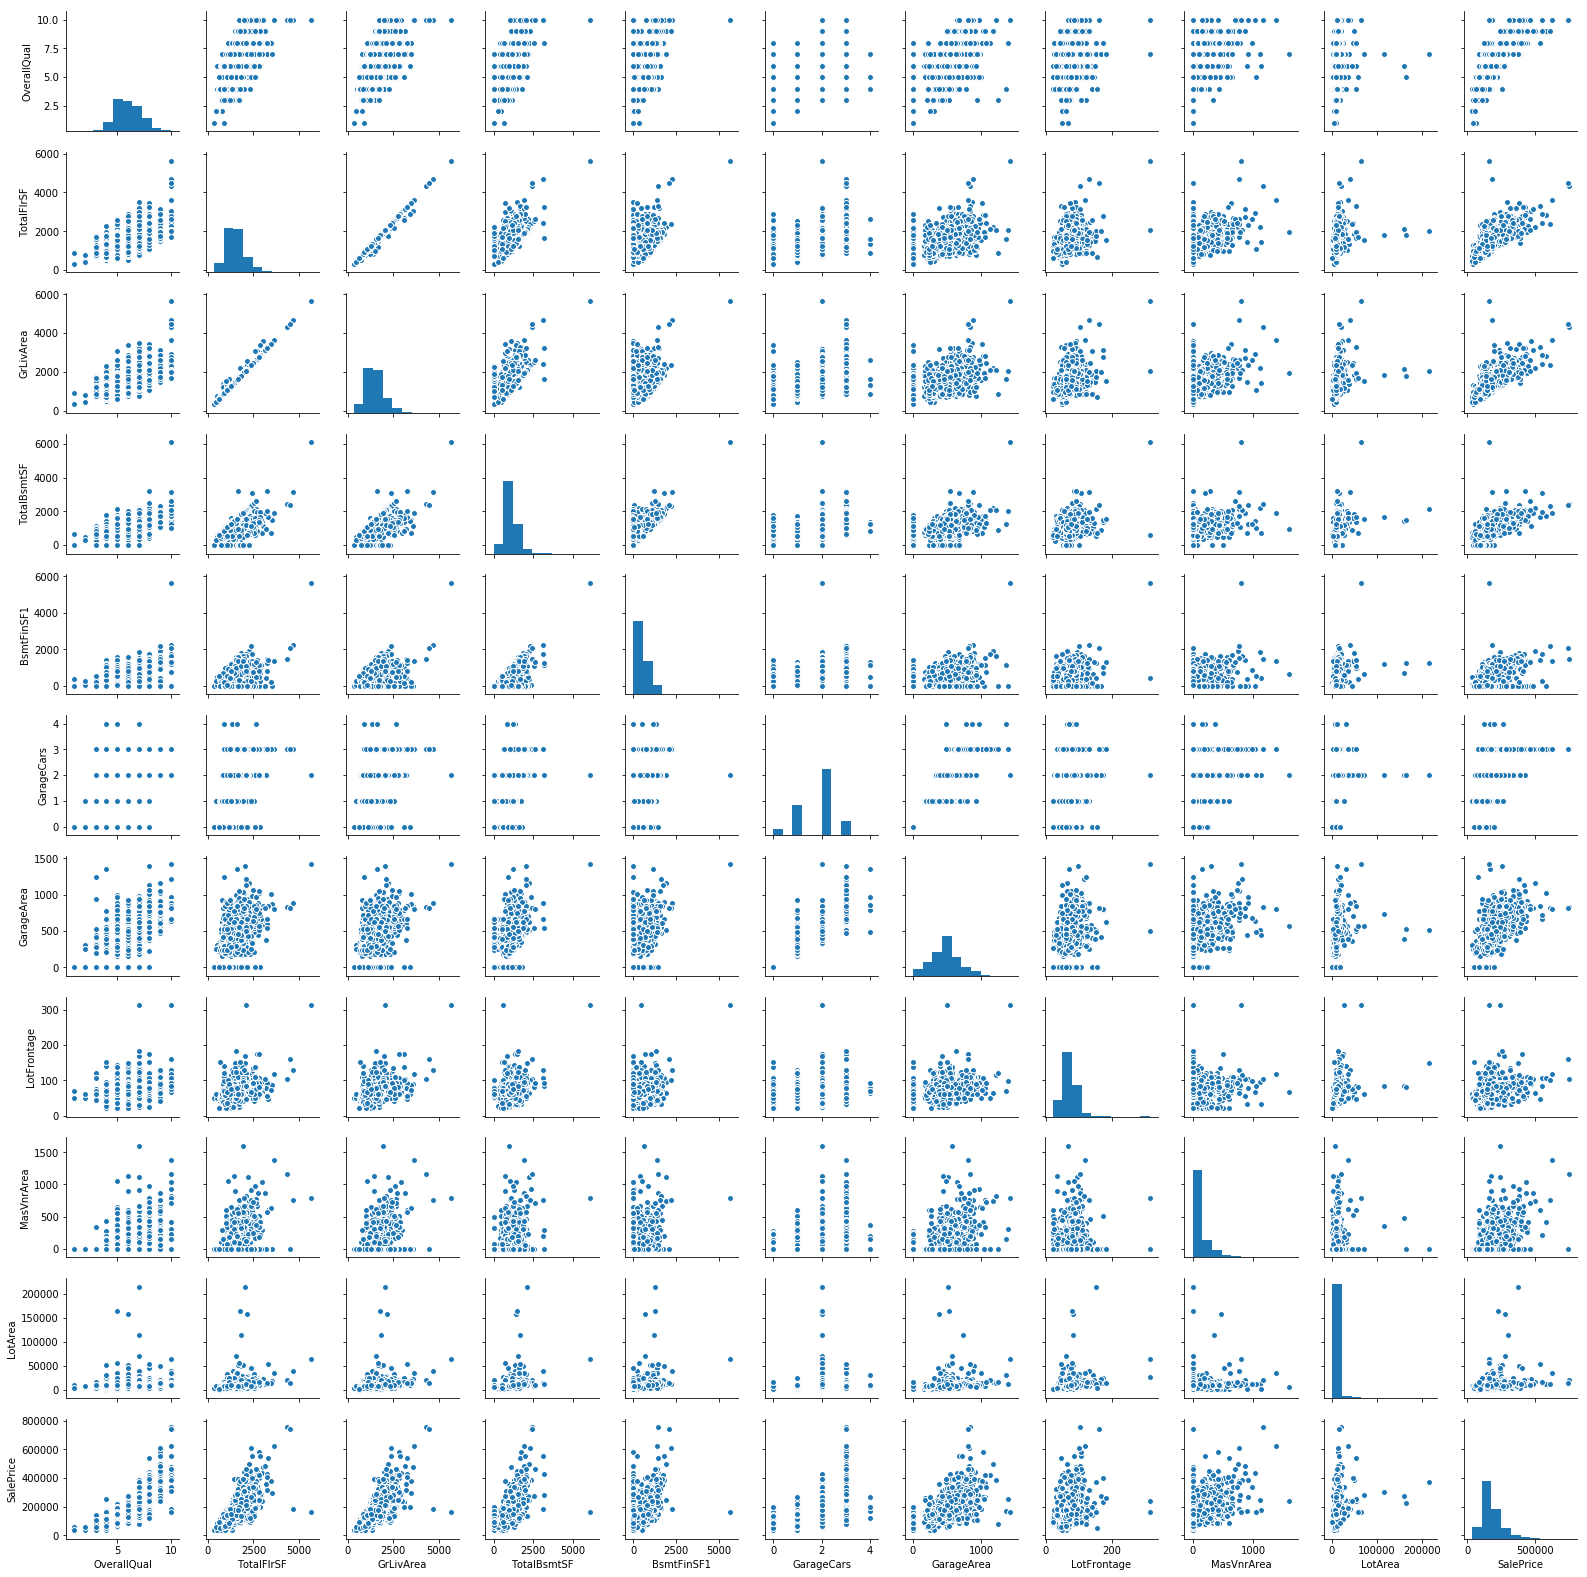

In [113]:
import seaborn as sns
sns.pairplot(X_train_pickup,size=2.0)
plt.show()

In [114]:
X_train_pickup.corr()

,OverallQual,TotalFlrSF,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageCars,GarageArea,LotFrontage,MasVnrArea,LotArea,SalePrice
OverallQual,1.000000,0.600758,0.593007,0.537808,0.239666,0.600671,0.562022,0.236282,0.407252,0.105806,0.790982
TotalFlrSF,0.600758,1.000000,0.995718,0.461738,0.215913,0.479932,0.479189,0.386336,0.397669,0.264850,0.716883
GrLivArea,0.593007,0.995718,1.000000,0.454868,0.208171,0.467247,0.468997,0.385982,0.388052,0.263116,0.708624
TotalBsmtSF,0.537808,0.461738,0.454868,1.000000,0.522396,0.434585,0.486665,0.370780,0.360067,0.260833,0.613581
BsmtFinSF1,0.239666,0.215913,0.208171,0.522396,1.000000,0.224054,0.296970,0.227212,0.261256,0.214103,0.386420
GarageCars,0.600671,0.479932,0.467247,0.434585,0.224054,1.000000,0.882475,0.279995,0.361945,0.154871,0.640409
GarageArea,0.562022,0.479189,0.468997,0.486665,0.296970,0.882475,1.000000,0.332306,0.370884,0.180403,0.623431
LotFrontage,0.236282,0.386336,0.385982,0.370780,0.227212,0.279995,0.332306,1.000000,0.188632,0.336997,0.346962
MasVnrArea,0.407252,0.397669,0.388052,0.360067,0.261256,0.361945,0.370884,0.188632,1.000000,0.103321,0.472614
LotArea,0.105806,0.264850,0.263116,0.260833,0.214103,0.154871,0.180403,0.336997,0.103321,1.000000,0.263843


In [115]:
X_3_train=X_train.loc[:,["OverallQual","TotalFlrSF","GrLivArea"]]
X_3_train.head()

,OverallQual,TotalFlrSF,GrLivArea
0,7,1710,1710
1,6,1262,1262
2,7,1786,1786
3,7,1717,1717
4,8,2198,2198


In [116]:
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [117]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_3_train) # すべての説明変数を変換
y_train_std = ss.fit_transform(y_train)

In [118]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [119]:
lr.fit(X_train_std,y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
lr.intercept_

array([1.2946823e-16])

In [121]:
lr.coef_

array([[ 0.56162161,  0.64516679, -0.26682524]])

In [122]:
X_2_test=X_1_test.loc[:,["OverallQual","TotalFlrSF","GrLivArea"]]
y_2_test=y_1_test

In [123]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_test_std = ss.fit_transform(X_2_test) # すべての説明変数を変換
y_test_std = ss.fit_transform(y_2_test)

In [124]:
print("R^2")
print("train score: %.3f" %lr.score(X_train_std,y_train_std))
print("test score: %.3f" %lr.score(X_test_std,y_test_std))

R^2
train score: 0.718
test score: 0.692


In [125]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [126]:
print('adjusted R^2')
print('train score: %3f' % adjusted(lr.score(X_train_std, y_train_std), len(y_train_std), 2))
print('test score : %3f' % adjusted(lr.score(X_test_std, y_test_std), len(y_test_std), 2))

adjusted R^2
train score: 0.717275
test score : 0.689966


In [138]:
test_data=test.loc[:,["OverallQual","TotalFlrSF","GrLivArea"]].values
y_pred=lr.predict(test_data).reshape(-1)

In [139]:
submit_file=pd.DataFrame({
    "id":test["Id"],
    "SalePrice": y_pred,
    })
submit_file.to_csv('submit.csv',index=False)